<a href="https://colab.research.google.com/github/ps-puneetsaini/Major-Project/blob/main/HeartGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

df = pd.read_csv("heart_2022_with_nans.csv")

num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 445132
Number of columns: 40


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats

file_path = "heart_2022_with_nans.csv"
df = pd.read_csv("heart_2022_with_nans.csv")

print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [11]:
print(df.isnull().sum())



State                           0
Sex                             0
GeneralHealth                 144
PhysicalHealthDays           1413
MentalHealthDays             1203
LastCheckupTime              1013
PhysicalActivities            138
SleepHours                    573
RemovedTeeth                 2301
HadHeartAttack                393
HadAngina                     495
HadStroke                     218
HadAsthma                     246
HadSkinCancer                 386
HadCOPD                       280
HadDepressiveDisorder         345
HadKidneyDisease              243
HadArthritis                  305
HadDiabetes                   178
DeafOrHardOfHearing          2236
BlindOrVisionDifficulty      2328
DifficultyConcentrating      2666
DifficultyWalking            2655
DifficultyDressingBathing    2638
DifficultyErrands            2866
SmokerStatus                 3927
ECigaretteUsage              3971
ChestScan                    6013
RaceEthnicityCategory        1752
AgeCategory   

In [14]:
df['GeneralHealth'].fillna(df['GeneralHealth'].median(), inplace=True)


TypeError: Cannot convert ['Very good' 'Excellent' 'Very good' ... 'Poor' 'Very good' 'Very good'] to numeric

In [15]:
df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0], inplace=True)
print(df.isnull().sum())


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [16]:
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].median(), inplace=True)
print(df.isnull().sum())


<ipython-input-16-8b0ae53343fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [17]:
df['MentalHealthDays'].fillna(df['MentalHealthDays'].median(), inplace=True)
print(df.isnull().sum())

<ipython-input-17-db7bf08612df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MentalHealthDays'].fillna(df['MentalHealthDays'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [18]:
df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0], inplace=True)
print(df.isnull().sum())

<ipython-input-18-02a092e6b598>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [19]:
df['PhysicalActivities'].fillna(df['PhysicalActivities'].mode()[0], inplace=True)
print(df.isnull().sum())

<ipython-input-19-27b54c183e8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhysicalActivities'].fillna(df['PhysicalActivities'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [20]:
df['SleepHours'].fillna(df['SleepHours'].median(), inplace=True)
print(df.isnull().sum())

<ipython-input-20-9f77a54a7bbe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SleepHours'].fillna(df['SleepHours'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [21]:
df['RemovedTeeth'].fillna(df['RemovedTeeth'].mode()[0], inplace=True)

print(df.isnull().sum())


<ipython-input-21-e37402567317>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemovedTeeth'].fillna(df['RemovedTeeth'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [22]:
df['HadHeartAttack'].fillna(df['HadHeartAttack'].mode()[0], inplace=True)
print(df.isnull().sum())


<ipython-input-22-f1b2f85c33cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadHeartAttack'].fillna(df['HadHeartAttack'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [23]:
df['HadAngina'].fillna(df['HadAngina'].mode()[0], inplace=True)
print(df.isnull().sum())


<ipython-input-23-3a01fef1e5b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadAngina'].fillna(df['HadAngina'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [24]:
df['HadStroke'].fillna(df['HadStroke'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-24-57b293cbbdef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadStroke'].fillna(df['HadStroke'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [25]:
df['HadAsthma'].fillna(df['HadAsthma'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-25-d72cf9542a5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadAsthma'].fillna(df['HadAsthma'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [26]:
df['HadSkinCancer'].fillna(df['HadSkinCancer'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-26-465aed9f34c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadSkinCancer'].fillna(df['HadSkinCancer'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [27]:
df['HadCOPD'].fillna(df['HadCOPD'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-27-497faa5825ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadCOPD'].fillna(df['HadCOPD'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [28]:
df['HadDepressiveDisorder'].fillna(df['HadDepressiveDisorder'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-28-c75dd3d0410c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadDepressiveDisorder'].fillna(df['HadDepressiveDisorder'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [29]:
df['HadKidneyDisease'].fillna(df['HadKidneyDisease'].mode()[0], inplace=True)
print(df.isnull().sum())

<ipython-input-29-e0d12be4c250>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadKidneyDisease'].fillna(df['HadKidneyDisease'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [30]:
df['HadArthritis'].fillna(df['HadArthritis'].mode()[0], inplace=True)
print(df.isnull().sum())


<ipython-input-30-54ab57ad5a3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadArthritis'].fillna(df['HadArthritis'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [31]:
df['HadDiabetes'].fillna(df['HadDiabetes'].mode()[0], inplace=True)
print(df.isnull().sum())




<ipython-input-31-6e862cfdf914>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadDiabetes'].fillna(df['HadDiabetes'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [32]:
df['DeafOrHardOfHearing'].fillna(df['DeafOrHardOfHearing'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-32-ec4e951dcdc8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DeafOrHardOfHearing'].fillna(df['DeafOrHardOfHearing'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [33]:
df['BlindOrVisionDifficulty'].fillna(df['BlindOrVisionDifficulty'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-33-3f376454cee2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BlindOrVisionDifficulty'].fillna(df['BlindOrVisionDifficulty'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [34]:
df['DifficultyConcentrating'].fillna(df['DifficultyConcentrating'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-34-7b7da707ca30>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DifficultyConcentrating'].fillna(df['DifficultyConcentrating'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [35]:
df['DifficultyWalking'].fillna(df['DifficultyWalking'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-35-b0a518be3b3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DifficultyWalking'].fillna(df['DifficultyWalking'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [36]:
df['DifficultyDressingBathing'].fillna(df['DifficultyDressingBathing'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-36-f06dfca55ce1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DifficultyDressingBathing'].fillna(df['DifficultyDressingBathing'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [37]:
df['DifficultyErrands'].fillna(df['DifficultyErrands'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-37-76c3c03e52d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DifficultyErrands'].fillna(df['DifficultyErrands'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [38]:
df['SmokerStatus'].fillna(df['SmokerStatus'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-38-b6904478bcf9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SmokerStatus'].fillna(df['SmokerStatus'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [39]:
df['ECigaretteUsage'].fillna(df['ECigaretteUsage'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-39-e0c71b2bc77b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ECigaretteUsage'].fillna(df['ECigaretteUsage'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                    56046
RaceEthnicityCategor

In [40]:
df['ChestScan'].fillna(df['ChestScan'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-40-14e9686d3d8b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ChestScan'].fillna(df['ChestScan'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [41]:
df['RaceEthnicityCategory'].fillna(df['RaceEthnicityCategory'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-41-910fc73dfec1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RaceEthnicityCategory'].fillna(df['RaceEthnicityCategory'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [42]:
df['AgeCategory'].fillna(df['AgeCategory'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-42-e3de7af33ec5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeCategory'].fillna(df['AgeCategory'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [43]:
df['HeightInMeters'].fillna(df['HeightInMeters'].median(), inplace=True)
print(df.isnull().sum())



<ipython-input-43-457a1f65c541>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeightInMeters'].fillna(df['HeightInMeters'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [44]:
df['WeightInKilograms'].fillna(df['WeightInKilograms'].median(), inplace=True)
print(df.isnull().sum())



<ipython-input-44-27202bd8b940>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WeightInKilograms'].fillna(df['WeightInKilograms'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [45]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)
print(df.isnull().sum())

<ipython-input-45-1b1df4463053>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].median(), inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [46]:
df['AlcoholDrinkers'].fillna(df['AlcoholDrinkers'].mode()[0], inplace=True)
print(df.isnull().sum())




<ipython-input-46-62492357ebdf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AlcoholDrinkers'].fillna(df['AlcoholDrinkers'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [47]:
df['HIVTesting'].fillna(df['HIVTesting'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-47-82c6b4b13a2e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HIVTesting'].fillna(df['HIVTesting'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [48]:
df['FluVaxLast12'].fillna(df['FluVaxLast12'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-48-c2d08069e4ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FluVaxLast12'].fillna(df['FluVaxLast12'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [49]:
df['PneumoVaxEver'].fillna(df['PneumoVaxEver'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-49-2051fd59c310>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PneumoVaxEver'].fillna(df['PneumoVaxEver'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [50]:
df['TetanusLast10Tdap'].fillna(df['TetanusLast10Tdap'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-50-02140376f980>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TetanusLast10Tdap'].fillna(df['TetanusLast10Tdap'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [51]:
df['HighRiskLastYear'].fillna(df['HighRiskLastYear'].mode()[0], inplace=True)
print(df.isnull().sum())



<ipython-input-51-4d32d3be2cef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HighRiskLastYear'].fillna(df['HighRiskLastYear'].mode()[0], inplace=True)


State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [52]:
df['CovidPos'].fillna(df['CovidPos'].mode()[0], inplace=True)
print(df.isnull().sum())

<ipython-input-52-ad42f9d7f523>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CovidPos'].fillna(df['CovidPos'].mode()[0], inplace=True)


State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [53]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [54]:
df.to_csv("cleaned_data.csv", index=False)

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "cleaned_data.csv"
df = pd.read_csv(file_path)

df.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.70,80.74,27.44,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.57,63.50,25.61,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


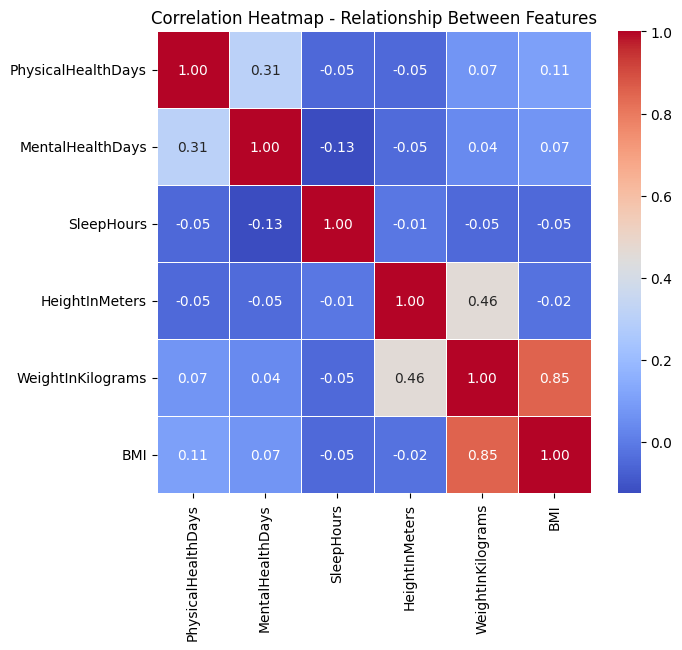

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "cleaned_data.csv"
df = pd.read_csv(file_path)

numerical_columns = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Relationship Between Features")
plt.show()


In [57]:
import pandas as pd

file_path = "cleaned_data.csv"
df = pd.read_csv(file_path)

df.replace({"Yes": 1, "No": 0}, inplace=True)

print(df.head())

df.to_csv("cleaned_data_numeric.csv", index=False)


<ipython-input-57-1b23b7ece037>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0}, inplace=True)


     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime  PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                   0   
1  Within past year (anytime less than 12 months ...                   0   
2  Within past year (anytime less than 12 months ...                   1   
3  Within past year (anytime less than 12 months ...                   1   
4  Within past year (anytime less than 12 months ...                   1   

   SleepHours  RemovedTeeth  HadHeartAttack  ...  HeightInMeters  \
0         8.0  None of them   

In [58]:
columns_to_remove = [
    "State", "RemovedTeeth", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",
    "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing",
    "TetanusLast10Tdap"
]
df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

print(df.head())

df.to_csv("cleaned_data_updated.csv", index=False)

      Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Female     Very good                 0.0               0.0   
1  Female     Excellent                 0.0               0.0   
2  Female     Very good                 2.0               3.0   
3  Female     Excellent                 0.0               0.0   
4  Female          Fair                 2.0               0.0   

                                     LastCheckupTime  PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                   0   
1  Within past year (anytime less than 12 months ...                   0   
2  Within past year (anytime less than 12 months ...                   1   
3  Within past year (anytime less than 12 months ...                   1   
4  Within past year (anytime less than 12 months ...                   1   

   SleepHours  HadHeartAttack  HadAngina  HadStroke  ...      AgeCategory  \
0         8.0               0          0          0  ...  Age 80 or older  

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = "cleaned_data_updated.csv"
df = pd.read_csv(file_path)

columns_to_encode = ["Sex", "GeneralHealth", "SmokerStatus", "ECigaretteUsage", "RaceEthnicityCategory"]

label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print(df.head())

df.to_csv("cleaned_data_numeric_updated.csv", index=False)


   Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0    0              4                 0.0               0.0   
1    0              0                 0.0               0.0   
2    0              4                 2.0               3.0   
3    0              0                 0.0               0.0   
4    0              1                 2.0               0.0   

                                     LastCheckupTime  PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                   0   
1  Within past year (anytime less than 12 months ...                   0   
2  Within past year (anytime less than 12 months ...                   1   
3  Within past year (anytime less than 12 months ...                   1   
4  Within past year (anytime less than 12 months ...                   1   

   SleepHours  HadHeartAttack  HadAngina  HadStroke  ...      AgeCategory  \
0         8.0               0          0          0  ...  Age 80 or older   
1         

In [60]:
for col, le in label_encoders.items():
    print(f"Mapping for {col}:")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping, "\n")



Mapping for Sex:
{'Female': 0, 'Male': 1} 

Mapping for GeneralHealth:
{'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4} 

Mapping for SmokerStatus:
{'Current smoker - now smokes every day': 0, 'Current smoker - now smokes some days': 1, 'Former smoker': 2, 'Never smoked': 3} 

Mapping for ECigaretteUsage:
{'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them every day': 2, 'Use them some days': 3} 

Mapping for RaceEthnicityCategory:
{'Black only, Non-Hispanic': 0, 'Hispanic': 1, 'Multiracial, Non-Hispanic': 2, 'Other race only, Non-Hispanic': 3, 'White only, Non-Hispanic': 4} 



In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "cleaned_data_numeric_updated.csv"
df = pd.read_csv(file_path)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust figsize if needed for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Relationship Between Features")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Print correlation matrix (optional)
# print(correlation_matrix)

ValueError: could not convert string to float: 'Within past year (anytime less than 12 months ago)'

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "cleaned_data_numeric_updated.csv"
df = pd.read_csv(file_path)

cardio_columns = [
    "GeneralHealth",
    "Age",
    "PhysicalHealthDays",
    "HadHeartAttack",
    "HadAngina",
    "HadCOPD",
    "HadKidneyDisease",
    "HadDiabetes",
    "SmokerStatus",
    "ECigaretteUsage",
    "PhysicalActivity",
    "HeightInMeters",
    "WeightInKilograms",
    "BMI",
    "AlcoholDrinkers",
    "HighRiskLastYear",
    "CovidPos"
]

relevant_columns = [col for col in cardio_columns if col in df.columns]
df_cardio = df[relevant_columns]

correlation_matrix = df_cardio.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Cardiovascular Attack Related Features")
plt.show()


ValueError: could not convert string to float: 'No, pre-diabetes or borderline diabetes'